In [ ]:
import torch
import torchvision
from torchvision import transforms as T
from PIL import Image
import cv2 
from google.colab.patches import cv2_imshow

In [ ]:
model = torchvision.models.detection.ssd300_vgg16(pretrained = True)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /root/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth


  0%|          | 0.00/136M [00:00<?, ?B/s]

In [ ]:
model.eval()

SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

In [ ]:
!wget 'http://images.cocodataset.org/val2017/000000037777.jpg'

--2023-02-22 06:27:10--  http://images.cocodataset.org/val2017/000000037777.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.9.156, 52.217.136.145, 54.231.135.105, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.9.156|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40833 (40K) [image/jpeg]
Saving to: ‘000000037777.jpg’

000000037777.jpg    100%[===================>]  39.88K  --.-KB/s    in 0.05s   

2023-02-22 06:27:11 (829 KB/s) - ‘000000037777.jpg’ saved [40833/40833]



In [ ]:
ig = Image.open('/content/000000037777.jpg')

In [ ]:
transform = T.ToTensor()
img = transform(ig)


In [ ]:
with  torch.no_grad():
  pred = model([img])

In [ ]:
pred[0].keys()

dict_keys(['boxes', 'scores', 'labels'])

In [ ]:
bbox, scores, labels = pred[0]["boxes"], pred[0]["scores"], pred[0]["labels"]

In [ ]:
bbox

tensor([[296.8343,  76.6260, 352.0000, 230.0000],
        [137.9991, 127.7944, 197.8559, 192.3149],
        [ 47.7719, 174.8144, 291.8065, 226.5563],
        [201.0731, 182.3301, 256.9838, 220.3994],
        [ 49.4556,  85.3956,  83.2604, 164.0248],
        [188.0019, 128.9855, 229.9614, 177.4531],
        [109.9328,  95.1930, 132.2697, 165.9795],
        [ 96.1544, 103.4669, 113.3666, 178.7998],
        [ 71.0474,  87.6160,  93.4132, 168.6719],
        [ 25.6719, 207.0689,  96.7011, 229.5757],
        [ 45.0322, 201.5023, 115.4670, 227.5960],
        [125.2601, 133.3300, 161.7572, 192.3159],
        [211.5031, 186.0792, 229.8496, 202.1066],
        [  9.2317, 165.0963, 203.5732, 219.5667],
        [ 34.0497,  89.2359,  63.7728, 159.7141],
        [261.5962, 187.0260, 309.9577, 230.0000],
        [296.6910,  86.3789, 330.2976, 167.8978],
        [231.0479, 201.8326, 249.0675, 217.0306],
        [224.5050, 177.7316, 299.8905, 228.7034],
        [204.1440, 183.4682, 235.0509, 207.6637],


In [ ]:
scores

tensor([0.9242, 0.9001, 0.6306, 0.4384, 0.1584, 0.1540, 0.1436, 0.1385, 0.1320,
        0.1292, 0.1189, 0.1133, 0.1101, 0.1097, 0.1097, 0.1089, 0.1048, 0.1044,
        0.1028, 0.1014, 0.1014, 0.0975, 0.0966, 0.0947, 0.0938, 0.0926, 0.0916,
        0.0911, 0.0906, 0.0899, 0.0893, 0.0885, 0.0882, 0.0876, 0.0860, 0.0846,
        0.0844, 0.0840, 0.0840, 0.0819, 0.0817, 0.0809, 0.0808, 0.0797, 0.0784,
        0.0772, 0.0764, 0.0756, 0.0752, 0.0751, 0.0746, 0.0743, 0.0743, 0.0739,
        0.0737, 0.0734, 0.0732, 0.0730, 0.0730, 0.0729, 0.0729, 0.0726, 0.0722,
        0.0718, 0.0695, 0.0692, 0.0679, 0.0676, 0.0663, 0.0662, 0.0659, 0.0644,
        0.0639, 0.0630, 0.0627, 0.0621, 0.0618, 0.0617, 0.0613, 0.0611, 0.0609,
        0.0609, 0.0607, 0.0594, 0.0593, 0.0586, 0.0585, 0.0580, 0.0579, 0.0577,
        0.0576, 0.0575, 0.0574, 0.0573, 0.0564, 0.0563, 0.0563, 0.0562, 0.0560,
        0.0560, 0.0559, 0.0557, 0.0557, 0.0555, 0.0554, 0.0552, 0.0551, 0.0541,
        0.0538, 0.0534, 0.0525, 0.0522, 

In [ ]:
labels

tensor([82, 79, 67, 51, 82, 79, 82, 82, 82, 62, 62, 79, 55, 67, 82, 62, 82, 55,
        62, 55, 82, 82, 67, 51, 82, 62, 79, 62, 82, 55, 82, 82, 82, 82, 62, 82,
        55, 67, 79, 79, 81, 79, 62, 82, 79, 79, 62, 82, 62, 82, 55, 62, 82, 44,
        55, 55, 82, 79, 79, 79, 52, 82, 79, 79, 67, 82, 82, 62, 79, 82, 81, 44,
        82, 55, 67, 55, 79, 62, 81, 82, 55, 53, 62, 62, 79, 82, 62, 82, 82, 81,
        55, 81, 79, 82, 67, 62, 55, 82, 62, 52, 55, 79, 79, 79, 82, 51, 62, 62,
        82, 82, 79, 81, 82, 81, 55, 79, 79, 79, 82, 67, 52, 44, 79, 78, 62, 53,
        67, 82, 79, 67, 62, 67, 79, 44, 82, 67, 55, 82, 82, 55, 62, 82, 62, 82,
        67, 79, 81, 44, 82, 82, 82, 55, 82, 55, 67, 53, 44, 79, 44, 82, 55, 62,
        62, 82, 78, 62, 82, 82, 81, 79, 81, 79, 82, 81, 82, 82, 62, 82, 82, 79,
        53, 81, 81, 53, 82, 79, 44, 55, 81, 82, 53, 55, 67, 44, 67, 81, 53, 81,
        67, 62])

In [ ]:
torch.argwhere(scores > 0.5)

tensor([[0],
        [1],
        [2]])

In [ ]:
num = torch.argwhere(scores > 0.5). shape[0]

In [ ]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" , 
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" , 
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" , 
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" , 
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX

In [ ]:
igg = cv2.imread("/content/000000037777.jpg")
for i in  range(num):
  x1, y1, x2, y2 = bbox[i].numpy().astype("int")
  igg = cv2.rectangle(igg, (x1, y1), (x2,y2),(0, 225, 0),1)
  class_name = coco_names[labels.numpy()[i] -1]
  igg = cv2.putText(igg, class_name, (x1 , y1 -10), font, 0.5, (225, 0 ,0), 1, cv2.LINE_AA)


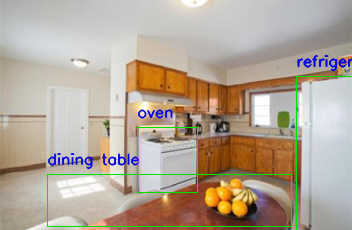

In [ ]:
cv2_imshow(igg)